# Dataset



For simplicity we use the Wine dataset from sklearn (UCI).

Features:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280od315_of_diluted_wines'
- proline

Labels: Wine classes

In [ ]:
from sklearn.datasets import load_wine
import numpy as np

data = load_wine()
features = data["data"]
labels = data["target"]
features.shape

(178, 13)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
try:
  import ipyvolume as ipv
except:
  !pip install ipyvolume -q
  import ipyvolume as ipv
  !jupyter nbextension enable --py --sys-prefix ipyvolume

def visualize_2d(x, labels):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=labels, s=100, alpha=0.8,
                    palette="Greens", edgecolor="black")

def visualize_3d(x, labels):
    # Workaround as axis limits are not auto-scaling
    x_norm = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    fig = ipv.figure(height=400, width=400)
    x, y, z = x_norm[:, 0], x_norm[:, 1], x_norm[:, 2]

    # Colors
    cmap = plt.get_cmap('Greens', 3)
    color = cmap(labels)
    ipv.scatter(x, y, z, size=4, marker="sphere", color=color)
    ipv.show()

# MDS

In [ ]:
# Precompute distance
from sklearn.metrics.pairwise import manhattan_distances

d_matrix = manhattan_distances(features)
d_matrix

array([[  0.  ,  51.06, 152.48, ..., 257.14, 249.41, 558.28],
       [ 51.06,   0.  , 148.3 , ..., 257.98, 250.55, 521.18],
       [152.48, 148.3 ,   0.  , ..., 384.76, 376.83, 649.14],
       ...,
       [257.14, 257.98, 384.76, ...,   0.  ,   8.15, 306.74],
       [249.41, 250.55, 376.83, ...,   8.15,   0.  , 312.09],
       [558.28, 521.18, 649.14, ..., 306.74, 312.09,   0.  ]])

Distance matrix of the first 10 data points...


<Axes: >

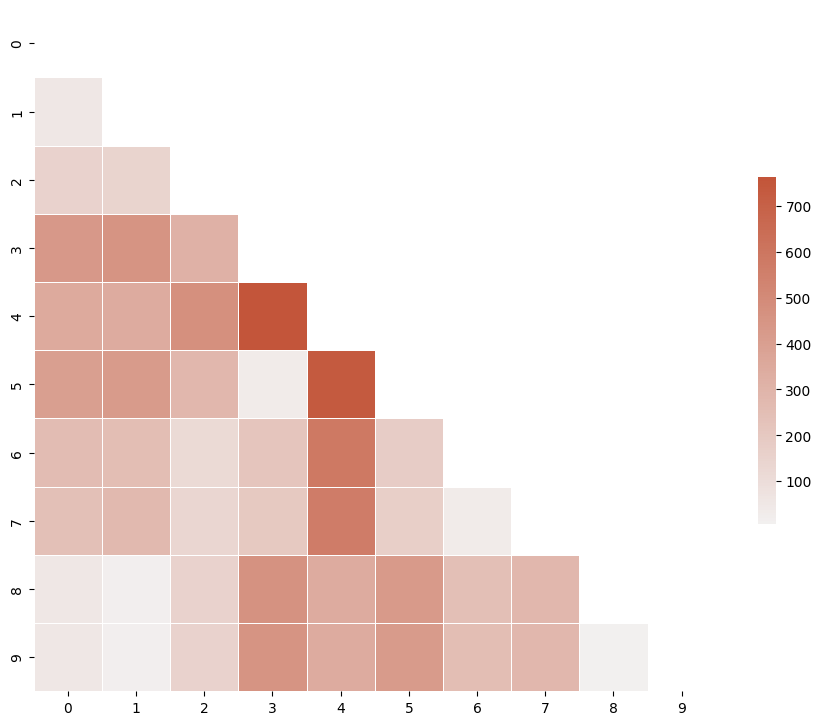

In [ ]:
import seaborn as sns
print("Distance matrix of the first 10 data points...")
distances = d_matrix[:10, :10]

mask = np.triu(np.ones_like(distances, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(distances, mask=mask, cmap=cmap, vmax=distances.max(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=3,
          normalized_stress=False,
          metric=True,
          dissimilarity="precomputed",
          random_state=2023,
          eps=1e-9)
%time mds_3d = mds.fit_transform(d_matrix)
visualize_3d(mds_3d, labels)

CPU times: user 1.13 s, sys: 888 ms, total: 2.02 s
Wall time: 1.07 s


Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Note: It works better with Manhatten distances - most likely the high dimension is a problem using the euclidean distance

In [ ]:
print("Raw stress: ", mds.stress_)

Raw stress:  882441.0641476295


CPU times: user 1.12 s, sys: 849 ms, total: 1.97 s
Wall time: 1.03 s


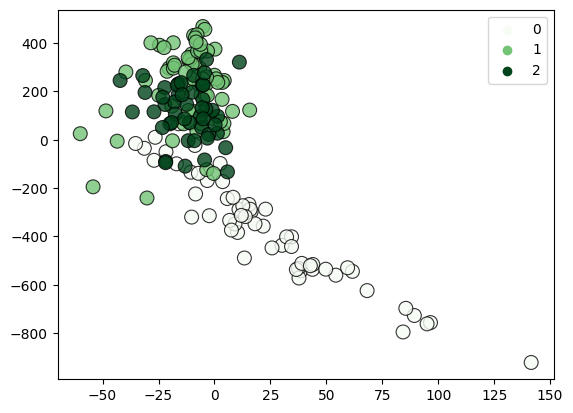

In [ ]:
mds = MDS(n_components=2, normalized_stress=False, eps=1e-9)
%time mds_2d = mds.fit_transform(features)
visualize_2d(mds_2d, labels)